<a href="https://www.bigdatauniversity.com"><img src = "https://ibm.box.com/shared/static/jvcqp2iy2jlx2b32rmzdt0tx8lvxgzkp.png" width = 300, align = "center"></a>

<h1 align=center><font size = 5> UNDERSTANDING CONVOLUTIONS</font></h1>



## Introduction

### Lesson
In this lesson, we will learn more about the key concepts behind the CNNs (Convolutional Neural Networks from now on).
This lesson is not intended to be a reference for _machine learning, deep learning, convolutions or TensorFlow_. The intention is to give notions to the user about these fields. 

### Audience
- Data scientists. General public related to computer science and machine learning.

- Readers interested on TensorFlow and in need of a cloud platform like Workbench Data Scientist.

### Pre-requisites:
Basic knowledge of linear algebra, Python, Neural Networks and TensorFlow.

----

##  Table of contents

<div class="alert alert-block alert-info" style="margin-top: 20px">
<font size = 3><strong>Clik on the links to see the sections:</strong></font>
<br>
- <p><a href="#ref1">Analogies</a></p>
- <p><a href="#ref2">Understanding and coding with Python</a></p>
- <p><a href="#ref3">Coding with TensorFlow</a></p>
- <p><a href="#ref4">Convolution applied on images</a></p>
- <p><a href="#ref5">Conclusion</a></p>
<p></p>
</div>
<br>


----------------


<a id="ref1"></a>
# Analogies

There are several ways to understand Convolutional Layers without using a mathematical approach. We are going to explore some of the ideas proposed by the Machine Learning community.

### Instances of Neurons

When you start to learn a programming language, one of the first phases of your development is the learning and application of functions. Instead of rewriting pieces of code everytime that you would, a good student is encouraged to code using functional programming, keeping the code organized, clear and concise.
CNNs can be thought of as a simplification of what is really going on, a special kind of neural network which uses identical copies of the same neuron. These copies include the same parameters (shared weights and biases) and activation functions.

### Location and type of connections

In a **fully connected layer NN**, <span style="background-color:yellow;">each neuron is connected to every neuron in the previous layer</span>, and <span style="background-color:yellow;">each connection has it's own weight</span>. This is a totally general purpose connection pattern and <span style="background-color:yellow;">makes no assumptions</span> about the features in the input data thus not using any advantage that the knowledge of the data being used can bring. These types of layers are also <span style="color:red;">very expensive in terms of memory and computation</span>.

In contrast, in a **convolutional layer** <span style="background-color:yellow;">each neuron is only connected to a few nearby local neurons in the previous layer</span>, and the <span style="background-color:yellow;">same set of weights</span> is used to connect to them. For example, in the following image, the neurons in the h1 layer are connected only to some input units (pixels).
      
<img src="https://ibm.box.com/shared/static/mev168hepixnmc9zhh4hsr3t2ks3rpcc.png" alt="HTML5 Icon" style="width:500px;height:500px;">
<center>A figure presented in one of Lecun's papers. It shows the spatial relation and how the connections are modified until the output layer</center> 


      
 



### Feature Learning

**Feature engineering** is the process of extracting useful patterns from input data that will help the prediction model to understand better the real nature of the problem. A good feature learning will present patterns in a way that increase significantly the accuracy and performance of the applied machine learning algorithms in a way that would be impossible or too expensive by the machine learning itself.

Feature learning algorithms find the common patterns that are important to distinguish between the wanted classes and extract them automatically. After this process, they are ready to be used in a classification or regression problem. 

The great advantage of CNNs is that they are uncommonly good at finding features in images that grow after each level, resulting in high-level features in the end. The final layers (can be one or more) use all these generated features for classification or regression. 

Basically, Convolutional Neural Networks are your best friend today to <span style="background-color:yellow;">automatically do Feature Engineering (Feature Learning)</span> without wasting too much time creating your own codes and <span style="background-color:yellow;">with no need of expertise in the field of Feature Engineering</span>.

<img src="https://ibm.box.com/shared/static/urzzkc7o5loqrlezcvn4kr594mxi9ftx.png" alt="HTML5 Icon" style="width:650px;height:250px;">
<center> Example of feature learning (automatically feature engineering), starting with simple features and ending with high-level features like human faces. <a> [[ref]](https://devblogs.nvidia.com/parallelforall/deep-learning-nutshell-core-concepts/) </a> </center>


### Image Filter

__How to create a convolved freature from an image ?__  
The image below is a 8x8 matrix of an image's pixels, converted to sing binary values in the next image(left), where 1 means a white pixel and 0 a black pixel. Later we will find out that typically this is a normalization, these values can actually have different scales. The most commmon usage is values between 0 and 255 for 8-bit grayscale images.  

<img src="https://ibm.box.com/shared/static/0s5v7doe2p5xuzifs47bxmmuwrn3kra2.bmp" alt="HTML5 Icon" style="width:200px;height:200px;">
<center>An example of a low resolution image to be recognized.</center> 

In the below image, with an animation, you can see how the two-dimensional convolution operation would operate on the images. This operation is <span style="background-color:yellow;">performed in most of the Deep Learning frameworks in their first phase</span>. We need a sliding windows to create the convolved matrix:

$
kernel=
\begin{bmatrix}
     1          & 0      & 1     \\
     0          & 1    & 0     \\
     1          & 0    & 1
\end{bmatrix}
\\
$ 




The <span style="background-color:yellow;">**sliding window** (a.k.a **kernel**, **filter** or **feature detector**)</span> with a preset calculation ([[x1, x0,x1], [x0,x1,x0], [x1,x0,x1]]) goes through the image and creates a new matrix (feature map).

 <img src="https://ibm.box.com/shared/static/fvutcm8jwa5j2o7xv2zzqyz2yu3zwhz4.gif" alt="HTML5 Icon" style="width:450px;height:300px;">
<center>  Animations showing how a kernel interact with a matrix representing an image. <a> [[ref]](http://cs231n.github.io/convolutional-networks/) </a> </center>  
 
 
In the example above we used a 3×3 filter (5x5 could also be used, but would be too complex). The values from the filter were <span style="background-color:yellow;">multiplied element-wise with the original matrix (input image), then summed up</span>. To get the **full convolved matrix**, the algorithm <span style="background-color:yellow;">keep repeating this small procedure for each element by sliding the filter over the whole original matrix</span>.

<img src="https://ibm.box.com/shared/static/7maczejdeej0qoz3pzkysw0y8qb70g2h.png" alt="HTML5 Icon" style="width:500px;height:200px;"> 
<center>  Illustration of the operation for one position of the kernel. <a> [[ref]](http://colah.github.io/posts/2014-07-Understanding-Convolutions/) </a> </center>

Just like the referenced example, we can think of a <span style="background-color:yellow;">one-dimensional convolution</span> as sliding function (1x1 or 1x2 filter) multiplying and adding on top of an array (1 dimensional array, instead of the original matrix).  
 
__What is the output of applying a kernel on an image?__   
The famous GIMP (Open Source Image Editor) has an explanation about the convolution operation applied to images that can help us understand how Neural Networks will interact with this tool.

<img src="https://ibm.box.com/shared/static/wixvbo9pk0f6r6ln879ah9jjo0ua0fo5.png" alt="HTML5 Icon" style="width:700px;height:350px;"> 
<center>   Applying the left kernel to the image will result into a <span style="background-color:yellow;">blurr effect</span>.<a> [[ref]](http://colah.github.io/posts/2014-07-Understanding-Convolutions/) </a> </center>


Well, this is very good if you want nice effects for your social media photos, but in the field of computer vision you need detailed patterns (remember feature learning) that are almost erased using a kernel like that. A more suitable example would be the Kernel/filter that shows edges from photos (the first recognizable feature of an image).


__Lets try another kernel: __  
Taking the values −1 and 1 on two adjacent pixels and zero everywhere else for the kernel, result in the following image. That is, we subtract two adjacent pixels. When side by side pixels are similar, this gives us approximately zero. On edges, however, adjacent pixels are very different in the direction perpendicular to the edge. Knowing that results distant from zero will result in brighter pixels, you can already guess the result of this type of kernel.

<img src="https://ibm.box.com/shared/static/z673yijcsfqs5rd8auc1dwmtkejyizv0.png" alt="HTML5 Icon" style="width:700px;height:350px;">
<center> Applying the new left kernel to the image will result into a <span style="background-color:yellow;">edge detection</span>, this output is normallly useful for the initial layers of a CNN.<a> [[ref]](http://colah.github.io/posts/2014-07-Understanding-Convolutions/) </a> </center>

***


<a id="ref2"></a>
# Understanding and Coding with Python

## Convolution: 1D Operation with Python (Numpy/Scipy)

### Mathematical notation
In this first example, we will use the pure mathematical notation. Here we have a one dimensional convolution operation. Lets say h is our image and x is our kernel:

$$x[i] = \{ 3, 4, 5 \}$$
$$h[i] = \{ 2, 1, 0 \}$$
$$where \ i = index$$

To use the convolution operation between the two arrays try the code below to see how it's easy to do in Python.

In [1]:
import numpy as np

h = [2, 1, 0]
x = [3, 4, 5]

y = np.convolve(x,h)
y

array([ 6, 11, 14,  5,  0])

sliding $x$ window over $h$:   
- $6  = 2 \cdot 3$
- $11 = 1 \cdot 3 + 2 \cdot 4$  
- $14 = 0 \cdot 3 + 1 \cdot 4 + 2 \cdot 5$  
- $5  = 0 \cdot 4 + 1 \cdot 5$  
- $0  = 0 \cdot 5$

#### Now we are going to verify what Python did, because we don't trust computer outputs while we are learning. Using the equation of convolution for y[n]: 
  
$$y[n] = \sum\limits_{k = 0}^{\infty} x[k] \cdot h[n-k] $$


And then, executing manually the computation:

$$
\begin{align}
y[0] &= \sum\limits_{k = 0}^{\infty} x[k]\cdot h[0-k]= x[0]\cdot h[0]=3\cdot 2 = 6\\
y[1] &= \sum\limits_{k = 0}^{\infty} x[k]\cdot h[1-k]= x[0]\cdot h[1-0]+x[1]\cdot h[1-1]\\
     &= x[0]\cdot h[1] + x[1]\cdot h[0]= 3\cdot1+4\cdot 2=11 \\
y[2] &= \sum\limits_{k = 0}^{\infty} x[k]\cdot h[2-k]= x[0]\cdot h[2-0]+x[1]\cdot h[2-1] + x[2]\cdot h[2-2]\\ 
     &= x[0]\cdot h[2] + x[1]\cdot h[1]+x[2]\cdot h[0]= 3\cdot0+4\cdot 1 +5\cdot 2=14 \\
y[3] &= \sum\limits_{k = 0}^{\infty} x[k] \cdot h[3-k] = x[0] \cdot h[3-0] + x[1] \cdot h[3-1] + x[2] \cdot h[3-2] + x[3] \cdot h[3-3]\\ 
     &= x[0] \cdot h[3] + x[1] \cdot h[2] + x[2]\cdot h[1] + x[3] \cdot h[0] = 0 + 0 + 5 \cdot 1 + 0 = 5 \\
y[4] &= \sum\limits_{k = 0}^{\infty} x[k]\cdot h[4-k]= x[0]\cdot h[4-0]+x[1]\cdot h[4-1]+x[2]\cdot h[4-2]+\space... =0
\end{align}
$$

### Simple Method for Calculating Linear Convolution (Youtube)
<a href="http://www.youtube.com/watch?feature=player_embedded&v=hBTGuOe9txE
" target="_blank"><img src="http://img.youtube.com/vi/hBTGuOe9txE/0.jpg"
alt="IMAGE ALT TEXT HERE" width="500" border="10"></a>
<center>Simple method to Calculate Discrete Linear Convolution and Correlation</center>

In [2]:
print("Compare with the following values from Python: y[0] = {0} ; y[1] = {1}; y[2] = {2}; y[3] = {3}; y[4] = {4}".format(y[0],y[1],y[2],y[3],y[4])) 

Compare with the following values from Python: y[0] = 6 ; y[1] = 11; y[2] = 14; y[3] = 5; y[4] = 0


### 3 NumPy Options to Apply Convolution
There are three methods to apply kernel on the matrix, __with padding (`full`)__, __with padding (`same`)__ and __without padding (`valid`)__:

** (1) Visually understanding the operation with padding (`full`)**

Lets think of the kernel as a sliding window. We have to come with the solution of padding zeros on the input array. Ths is a very famous implementation and will be easier to show how it works with a simple example, consider this case:

$$
x[i] = [6,2]\\
h[i] = [1,2,5,4]
$$

Using the **zero padding**, we can calculate the convolution.
 
You have to <span style="background-color:yellow;">invert the filter x</span>, otherwise the operation would be cross-correlation.
First step, (now with zero padding): 

$= 2 \cdot 0 + 6 \cdot 1 = 6$
 
Second step:

$= 2 \cdot 1 + 6 \cdot 2 = 14$ (the arrows represent the connection between the kernel and the input)

Third step:

$= 2 \cdot 2 + 6 \cdot 5 = 34$
  
Fourth step:

$= 2 \cdot 5 + 6 \cdot 4 = 34$

Fifth step:

$= 2 \cdot 4 + 6 \cdot 0 = 8$
 
The result of the convolution for this case, listing all the steps, would then be: $Y = [6, 14, 34, 34, 8]$

Below we verify with numpy:

In [3]:
import numpy as np

x = [6, 2]
h = [1, 2, 5, 4]

y = np.convolve(x, h, "full")  #now, because of the zero padding, the final dimension of the array is bigger
y  

array([ 6, 14, 34, 34,  8])

**(2) Visually understanding the operation with "`same`"**

In this approach, we just add the zero to left (and top of the matrix in 2D). That is, <span style="background-color:yellow;">only the first 4 steps of "full" method</span>:

In [4]:
import numpy as np

x = [6, 2]
h = [1, 2, 5, 4]

y = np.convolve(x, h, "same")  #it is same as zero padding, but withgenerates same 
y  

array([ 6, 14, 34, 34])

**(3) Visually understanding the operation with no padding (`valid`)**

In the last case we only applied the kernel when we had a compatible position on the h array, in some cases you want a dimensionality reduction. For this purpose, we simple ignore the steps tha would need padding:

$$
x[i] = [6, 2]\\
h[i] = [1, 2, 5, 4]
$$

You have to invert the filter x, otherwise the operation would be cross-correlation.
First step, (now without zero padding):

$= 2 \cdot 1 + 6 \cdot 2 = 14$ (the arrows represent the connection between the kernel and the input)

Second step: 

$= 2 \cdot 2 + 6 \cdot 5 = 34$ 
  
Third step:

$= 2 \cdot 5 + 6 \cdot 4 = 34$

The result of the convolution for this mode would then be $Y = [14, 34, 34]$ = [ First, second, third step]

Let's verify with numpy

In [5]:
import numpy as np

x= [6, 2]
h= [1, 2, 5, 4]

y= np.convolve(x, h, "valid")  #we will understand why we used the argument valid in the next example
y  

array([14, 34, 34])

### Convolution: 2D operation with Python (Numpy/Scipy)

**<p style="text-decoration: underline;">Example 1</p>**

The 2D convolution operation is defined as:

$$
\large{I'= \sum\limits_{u,v} I(x-u,y-v) \cdot g(u,v)}
$$
 
Below we will apply the equation to an image represented by a $3 \times 3$ matrix according to the function $g = (-1, 1)$. <span style="background-color:yellow;">Please note that when we apply the kernel we always use its inversion.</span>
 
$
I=
\begin{bmatrix}
     255          & 7      & 3     \\
     212          & 240    & 4     \\
     218          & 216    & 230
\end{bmatrix}
\\
$ 

$
g=
\begin{bmatrix}
     -1          & 1      
\end{bmatrix}
\\
$ 
  
$
\begin{bmatrix}
    \boldsymbol{1} \cdot \boldsymbol{0}      & \boldsymbol{-1} \cdot \boldsymbol{255}  & 7      & 3     \\
    0              & 212          & 240    & 4     \\
    0              & 218          & 216    & 230
\end{bmatrix}
\rightarrow
\begin{bmatrix}
    \boldsymbol{-255}  & ?      & ?     \\
    ?            & ?    & ?     \\
    ?            & ?    & ?
\end{bmatrix}
\\
$

$
\begin{bmatrix}
    \boldsymbol{1} \cdot \boldsymbol{255}      & \boldsymbol{-1} \cdot \boldsymbol{7}  & 3    \\
    212          & 240    & 4     \\
    218          & 216    & 230
\end{bmatrix}
\rightarrow
\begin{bmatrix}
    -255           & \boldsymbol{248}      & ?     \\
    ?            & ?    & ?     \\
    ?            & ?    & ?
\end{bmatrix}
\\
$

$
\begin{bmatrix}
    255          & \boldsymbol{1} \cdot \boldsymbol{7}  & \boldsymbol{-1} \cdot \boldsymbol{3}    \\
    212          & 240    & 4     \\
    218          & 216    & 230
\end{bmatrix}
\rightarrow
\begin{bmatrix}
    -255           & 248      & \boldsymbol{4}     \\
    ?            & ?      & ?     \\
    ?            & ?      & ?
\end{bmatrix}
\\
$

  
$
\begin{bmatrix}
    0              & 255          & 7          & 3     \\
    \boldsymbol{1} \cdot \boldsymbol{0}    & \boldsymbol{-1} \cdot \boldsymbol{212}  & 240     & 4     \\
    0              & 218          & 216    & 230
\end{bmatrix}
\rightarrow
\begin{bmatrix}
    -255  & 248    & 4     \\
    \boldsymbol{-212}            & ?    & ?     \\
    ?            & ?    & ?
\end{bmatrix}
\\
$
 
 


We don't have to finish the calculations, we have the computer at our side. So, let's see what is the code to proceede with this operation: 

In [11]:
from scipy import signal as sg

I= [[255,   7,  3],
    [212, 240,  4],
    [218, 216, 230],]

g= [[-1,1]]

print ('With zero padding (full as default)')
print sg.convolve(I, g)
print '\n'

print ('With zero padding (same)')
print sg.convolve(I, g, 'same')
print '\n'

print ('Without zero padding (valid)')
print ('{0} \n'.format(sg.convolve(I, g, 'valid')))
# The 'valid' argument states that the output consists only of those elements 
# that do not rely on the zero-padding.

With zero padding (full as default)
[[-255  248    4    3]
 [-212  -28  236    4]
 [-218    2  -14  230]]


With zero padding (same)
[[-255  248    4]
 [-212  -28  236]
 [-218    2  -14]]


Without zero padding (valid)
[[248   4]
 [-28 236]
 [  2 -14]] 



**<p style="text-decoration: underline;">Example 2</p>**

For a more difficult case where

$
g = 
\begin{bmatrix}
    -1    &1    \\
    2     &3
\end{bmatrix}
$

$
\begin{bmatrix}
    \boldsymbol{3} \cdot \boldsymbol{0}      & \boldsymbol{2} \cdot \boldsymbol{0}     & 0      & 0     \\
    \boldsymbol{1} \cdot \boldsymbol{0}      & \boldsymbol{-1} \cdot \boldsymbol{255}  & 7      & 3     \\
    0              & 212          & 240    & 4     \\
    0              & 218          & 216    & 230
\end{bmatrix}
\rightarrow
\begin{bmatrix}
    \boldsymbol{-255}  & ?      & ?     \\
    ?            & ?    & ?     \\
    ?            & ?    & ?
\end{bmatrix}
\\
$

In [14]:
from scipy import signal as sg

I = [[255,   7,  3],
    [212, 240,  4],
    [218, 216, 230],]

g = [[-1,  1],
    [ 2,  3],]

print ('With zero padding (full as default)')
print ('{0} \n'.format(sg.convolve( I, g, 'full')))
# The output is the full discrete linear convolution of the inputs. 
# It will use zero to complete the input matrix

print ('With zero padding (same)')
print ('{0} \n'.format(sg.convolve( I, g, 'same')))
# The output is the full discrete linear convolution of the inputs. 
# It will use zero to complete the input matrix

print ('Without zero padding (valid)')
print (sg.convolve( I, g, 'valid'))
# The 'valid' argument states that the output consists only of those elements 
#that do not rely on the zero-padding.

With zero padding (full as default)
[[-255  248    4    3]
 [ 298  751  263   13]
 [ 206 1118  714  242]
 [ 436 1086 1108  690]] 

With zero padding (same)
[[-255  248    4]
 [ 298  751  263]
 [ 206 1118  714]] 

Without zero padding (valid)
[[ 751  263]
 [1118  714]]


----------------

<a id="ref3"></a>
# Coding with TensorFlow

Numpy is great because it has high optimized matrix operations implemented in a backend using C/C++. However, if our goal is to work with DeepLearning, we need much more. <span style="background-color:yellow;">TensorFlow does the same work, but instead of returning to Python everytime, it creates all the operations in the form of graphs and execute them once with the highly optimized backend.</span>

Suppose that you have two tensors:

* 3 x 3 filter (4D tensor = [3, 3, 1, 1] = [width, height, channels, number of filters])
* 10 x 10 image (4D tensor = [1, 10, 10, 1] = [batch size, width, height, number of channels]

The output size for zero padding **'`SAME`'** mode will be:
* <span style="background-color:yellow;">the same as input</span> => 10 x 10  

The output size without zero padding **'`VALID`'** mode:  
* <span style="background-color:yellow;">input size - kernel dimension + 1</span> = 10 - 3 + 1 = 8 => 8 x 8 

In [2]:
import tensorflow as tf

#Building graph

input = tf.Variable(tf.random_normal([1, 10, 10, 1]))
filter = tf.Variable(tf.random_normal([3, 3, 1, 1]))
op = tf.nn.conv2d(input, filter, strides = [1, 1, 1, 1], padding = 'VALID')
op2 = tf.nn.conv2d(input, filter, strides = [1, 1, 1, 1], padding = 'SAME')

#Initialization and session
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)

    print("Input \n")
    print('{0} \n'.format(input.eval()))
    print("Filter/Kernel \n")
    print('{0} \n'.format(filter.eval()))
    print("Result/Feature Map without padding (VALID) \n")
    result = sess.run(op)
    print(result)
    print('\n')
    print("Result/Feature Map with padding (SAME) \n")
    result2 = sess.run(op2)
    print(result2)

Input 

[[[[ -7.34187067e-01]
   [  1.77855265e+00]
   [ -1.63292038e+00]
   [  3.27357113e-01]
   [ -2.62483895e-01]
   [  1.13360322e+00]
   [ -3.86771768e-01]
   [  1.01967072e+00]
   [ -1.61507213e+00]
   [ -5.57417795e-03]]

  [[  1.54855013e-01]
   [  1.32625282e+00]
   [ -8.40794921e-01]
   [ -1.51998174e+00]
   [  1.96255833e-01]
   [ -5.17216623e-01]
   [  1.15381114e-01]
   [ -9.33627263e-02]
   [ -3.55662078e-01]
   [ -1.75153270e-01]]

  [[ -2.08104312e-01]
   [ -8.06859791e-01]
   [ -1.53173029e-01]
   [  1.36606127e-01]
   [ -1.56660393e-01]
   [ -8.43996257e-02]
   [  1.04071307e+00]
   [ -1.31882823e+00]
   [ -3.62712950e-01]
   [  3.69425386e-01]]

  [[  5.25565565e-01]
   [ -4.59713265e-02]
   [ -1.64374471e+00]
   [  2.32866630e-02]
   [ -1.09715331e+00]
   [ -6.83241963e-01]
   [  5.91689050e-01]
   [ -9.89125073e-01]
   [ -1.29958987e+00]
   [ -1.69631994e+00]]

  [[  1.02363378e-01]
   [ -5.07513769e-02]
   [ -8.00371587e-01]
   [  4.99078840e-01]
   [  9.70051587

----------------

<a id="ref4"></a>
# Convolution applied on images

Upload your own image (drag and drop to this window) and type its name on the input field on the next cell (press _shift + enter_). The result of this pre-processing will be an image with only a greyscale channel.

You can type _bird.jpg_ to use a default image

In [4]:
# download standard image
!wget --quiet https://ibm.box.com/shared/static/cn7yt7z10j8rx6um1v9seagpgmzzxnlz.jpg --output-document resources/data/bird.jpg

Please type the name of your test image after uploading to your notebook (just drag and grop for upload. Please remember to type the extension of the file. Default: bird.jpg
resources/data/bird.jpg

 Original type: <PIL.Image.Image image mode=L size=1920x1440 at 0x7F3D3D9A1810> 


After conversion to numerical representation: 

 array([[ 64,  71,  64, ...,  49,  47,  48],
       [ 68,  71,  63, ...,  53,  52,  51],
       [ 65,  69,  65, ...,  54,  50,  55],
       ..., 
       [ 21,  23,  22, ..., 184, 170, 154],
       [ 17,  20,  26, ..., 179, 165, 152],
       [ 26,  22,  21, ..., 170, 159, 148]], dtype=uint8)

 Input image converted to gray scale: 



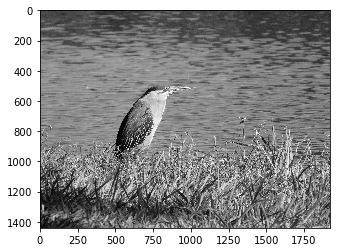

In [6]:
#Importing
import numpy as np
from scipy import signal
from scipy import misc
import matplotlib.pyplot as plt
from PIL import Image


### Load image of your choice on the notebook
print("Please type the name of your test image after uploading to \
your notebook (just drag and grop for upload. Please remember to \
type the extension of the file. Default: bird.jpg")

raw = raw_input()

im = Image.open(raw)  # type here your image's name

# uses the ITU-R 601-2 Luma transform (there are several 
# ways to convert an image to grey scale)

image_gr = im.convert("L")    
print("\n Original type: %r \n\n" % image_gr)

# convert image to a matrix with values from 0 to 255 (uint8)
arr = np.asarray(image_gr)
print("After conversion to numerical representation: \n\n %r" % arr)

### Activating matplotlib for Ipython
%matplotlib inline

### Plot image

imgplot = plt.imshow(arr)
imgplot.set_cmap('gray')  #you can experiment different colormaps (Greys,winter,autumn)
print("\n Input image converted to gray scale: \n")
plt.show(imgplot)

Now, we will experiment using an **edge detector kernel**.

In [7]:
# Edge Detector Kernel

kernel = np.array([
                        [ 0, 1, 0],
                        [ 1,-4, 1],
                        [ 0, 1, 0],
                                     ])

grad = signal.convolve2d(arr, kernel, mode='same', boundary='symm')

GRADIENT MAGNITUDE - Feature map


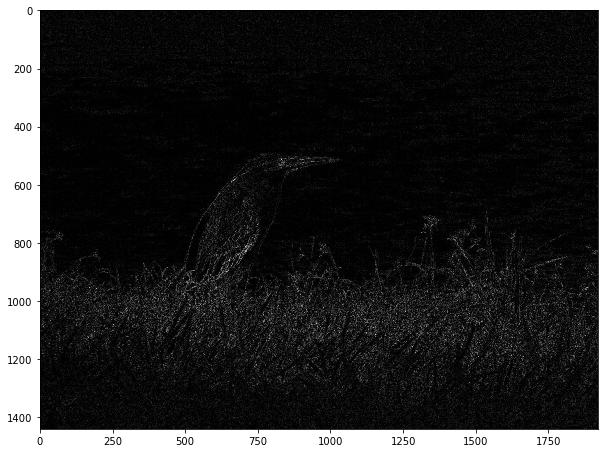

In [8]:
%matplotlib inline

print('GRADIENT MAGNITUDE - Feature map')

fig, aux = plt.subplots(figsize = (10, 10))
aux.imshow(np.absolute(grad), cmap = 'gray')


If we change the kernel and start to analyse the outputs we would be acting as a CNN. The difference is that a Neural Network do all this work automatically (the kernel adjustment using different weights). In addition, we can understand how biases affect the behaviour of feature maps

__Note__: when you are dealing with most of the real applications of CNNs, you usually convert the pixels values to a range from 0 to 1. This process is called **normalization**.

In [9]:
type(grad)

grad_biases = np.absolute(grad) + 100

grad_biases[grad_biases > 255] = 255


GRADIENT MAGNITUDE - Feature map


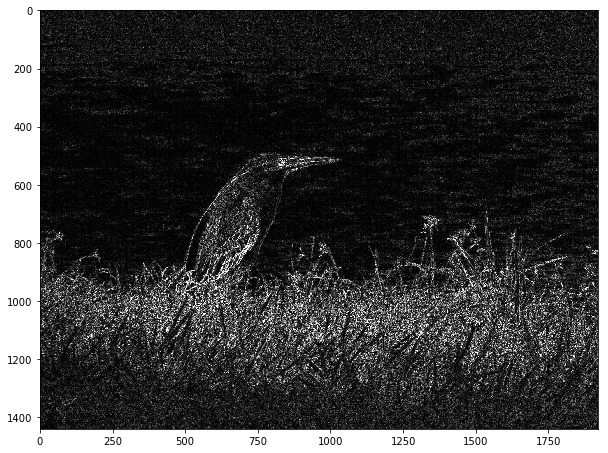

In [10]:
%matplotlib inline

print('GRADIENT MAGNITUDE - Feature map')

fig, aux = plt.subplots(figsize=(10, 10))
aux.imshow(np.absolute(grad_biases), cmap='gray')

---

# Functions in This Document

| Function | Description |
|:---------|:------------|
|[**`tf.random_normal`**](https://www.tensorflow.org/api_docs/python/tf/random_normal)|Outputs random values from a normal distribution.|
|[**`tf.nn.conv2d`**](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d)|Computes a 2-D convolution given 4-D input and filter tensors.|
|[**`scipy.signal.convolve2d`**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html)|Convolve two 2-dimensional arrays.|
|[**`numpy.absolute`**](https://docs.scipy.org/doc/numpy/reference/generated/numpy.absolute.html)|Calculate the absolute value element-wise.|
|[**`matplotlib.pyplot.subplots`**](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.subplots.html)|Create a figure and a set of subplots.|


<a id="ref5"></a>
# Conclusion

This understanding of how convolutions work are the foundation of how Convolutional Neural Networks work. After this tuorial you are supposed to understand the underlying mathematical concepts and how to apply them using Python (NumPy) and Tensorflow. The next setp is to extrapolate this knowledge to Machine Learning applications.

## Want to learn more?

Running deep learning programs usually needs a high performance platform. PowerAI speeds up deep learning and AI. Built on IBM's Power Systems, PowerAI is a scalable software platform that accelerates deep learning and AI with blazing performance for individual users or enterprises. The PowerAI platform supports popular machine learning libraries and dependencies including Tensorflow, Caffe, Torch, and Theano. You can download a [free version of PowerAI](https://cocl.us/ML0120EN_PAI).

Also, you can use Data Science Experience to run these notebooks faster with bigger datasets. Data Science Experience is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, DSX enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of DSX users today with a free account at [Data Science Experience](https://cocl.us/ML0120EN_DSX)This is the end of this lesson. Hopefully, now you have a deeper and intuitive understanding regarding the LSTM model. Thank you for reading this notebook, and good luck on your studies.

### Thanks for completing this lesson!

Created by <a href = "https://linkedin.com/in/luisotsm"> Luis O. Silveira Martins</a> ,  <a href = "https://linkedin.com/in/erich-natsubori-sato">Erich Natsubori Sato</a></h4> , <a href = "https://linkedin.com/in/saeedaghabozorgi"> Saeed Aghabozorgi </a></h4>



# REFERENCES

+ Stanford CS231: [Convolutional Neural Networks (CNNs / ConvNets)](http://cs231n.github.io/convolutional-networks/)

+ https://github.com/joanbruna/stat212b/blob/master/lec1.pdf  
+ http://deeplearning.stanford.edu/wiki/index.php/Feature_extraction_using_convolution  
+ http://homepages.inf.ed.ac.uk/rbf/HIPR2/fourier.htm  